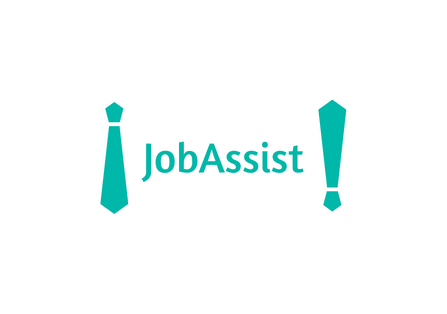

[Skip to Console](#console)

## Setup

In [10]:
import ipywidgets as widgets
from linkedin_process import scrapeLinkedIn
from glassdoor_process import getGlassdoor
from indeed_process import fetch_resume
from books_process import getBooks
from jinja2 import Template
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

### Widget Declaration

In [11]:
text = widgets.Text(
    value='',
    placeholder='Enter LinkedIn URL',
    description='Input:',
    disabled=False
)

button = widgets.Button(
    description='Submit',
    disabled=False,
    button_style='',
    tooltip='Submit',
    icon='check' 
)

int_progress = widgets.IntProgress(
    value=0,
    min=0,
    max=10,
    description='Loading:',
    bar_style='', 
    style={'bar_color': 'maroon'},
    orientation='horizontal'
)

li_output = widgets.Output()
gl_output = widgets.Output()
ind_output = widgets.Output()
books_output = widgets.Output()


### Event Handling

In [12]:

def on_click_handler(b):
    try: 
        int_progress.value = 0
        int_progress.description = "Loading:"
        int_progress.style={'bar_color': 'maroon'}
        int_progress.value += 2
        if text.value.startswith("https://www.linkedin.com/jobs/view/"):
            # Load LinkedIn Results

            li_vars = {}
            li_vars['html'], li_vars['title'], li_vars['company'], li_vars['loc'], li_vars['jd'],\
                                  li_vars['keywords'], li_vars['logo'] = scrapeLinkedIn(text.value)

            li_output.clear_output()
            with li_output:
                f = open("templates/linkedin_output.html", "rt")
                h = f.read() 
                myFancyTemplate = Template(h)
                display(HTML(myFancyTemplate.render(li_vars = li_vars)))
                f.close()
            int_progress.value += 2
            int_progress.style={'bar_color': 'yellow'} 

            # Load Indeed Results

            ind_vars = {}
            ind_vars['title'] = fetch_resume(li_vars['title'])

            ind_output.clear_output()
            with ind_output:
                f = open("templates/resume1.html", "rt")
                h = f.read() 
                myFancyTemplate = Template(h)
                display(HTML(myFancyTemplate.render()))
                f.close()

            int_progress.value += 2


            # Load Glassdoor Results

            temp = getGlassdoor(li_vars['company'], li_vars['title'])
            gl_vars = {}
            gl_vars['Name'], gl_vars['Type'], gl_vars['Website'],\
                        gl_vars['Founded'], gl_vars['Headquarters'], gl_vars['Industry'], \
                        gl_vars['Revenue'], gl_vars['Size'], gl_vars['Role'], gl_vars['Total Pay'], \
                        gl_vars['Base Pay'], gl_vars['Bonus'], gl_vars['Rating'], \
                        gl_vars['Recommended to a friend'], gl_vars['Approval of CEO'] = (
                                                                                temp['Name'], temp['Type'], temp['Website'],
                                                                                temp['Founded'], temp['Headquarters'], temp['Industry'],
                                                                                temp['Revenue'], temp['Size'], temp['Role'], temp['Total Pay'],
                                                                                temp['Base Pay'], temp['Bonus'], temp['Rating'],
                                                                                temp['Recommended to a friend'], temp['Approval of CEO'])
            del temp
            try:
                gl_vars['Rating'] = int(float(gl_vars['Rating']))
            except:
                gl_vars['Rating'] = 0

            gl_output.clear_output()
            with gl_output:
                f = open("templates/glassdoor_output.html", "rt")
                h = f.read() 
                myFancyTemplate = Template(h)
                display(HTML(myFancyTemplate.render(gl_vars = gl_vars)))
                f.close()

            int_progress.value += 2

            # Load Books results
            books = {}
            books = getBooks(li_vars['keywords'])

            books_output.clear_output()
            with books_output:
                f = open("templates/google_books_output.html", "rt")
                h = f.read() 
                myFancyTemplate = Template(h)
                display(HTML(myFancyTemplate.render(books = books)))
                f.close()

            int_progress.value += 2
            int_progress.style={'bar_color': 'green'}
            int_progress.description = "Completed!"
        else:
            print("Please enter a valid LinkedIn listing link")
    except: 
        print("Oops! Something went wrong. Please try again later.")
    print("--------------------------------------")
    
button.on_click(on_click_handler)

In [13]:
# Test Links
url = [
    "https://www.linkedin.com/jobs/view/3303581435/",
    "https://www.linkedin.com/jobs/view/3312712510/",
    "https://www.linkedin.com/jobs/view/3295261705/",
    "https://www.linkedin.com/jobs/view/3313040098/",
    "https://www.linkedin.com/jobs/view/3312642117/",
    "https://www.linkedin.com/jobs/view/3309210605/",
    "https://www.linkedin.com/jobs/view/3309217322/",
    "https://www.linkedin.com/jobs/view/3303362550/",
    "https://www.linkedin.com/jobs/view/3313051471/",
    "https://www.linkedin.com/jobs/view/3313057452/"
]

## JobAssist Console
<a id='console'></a>

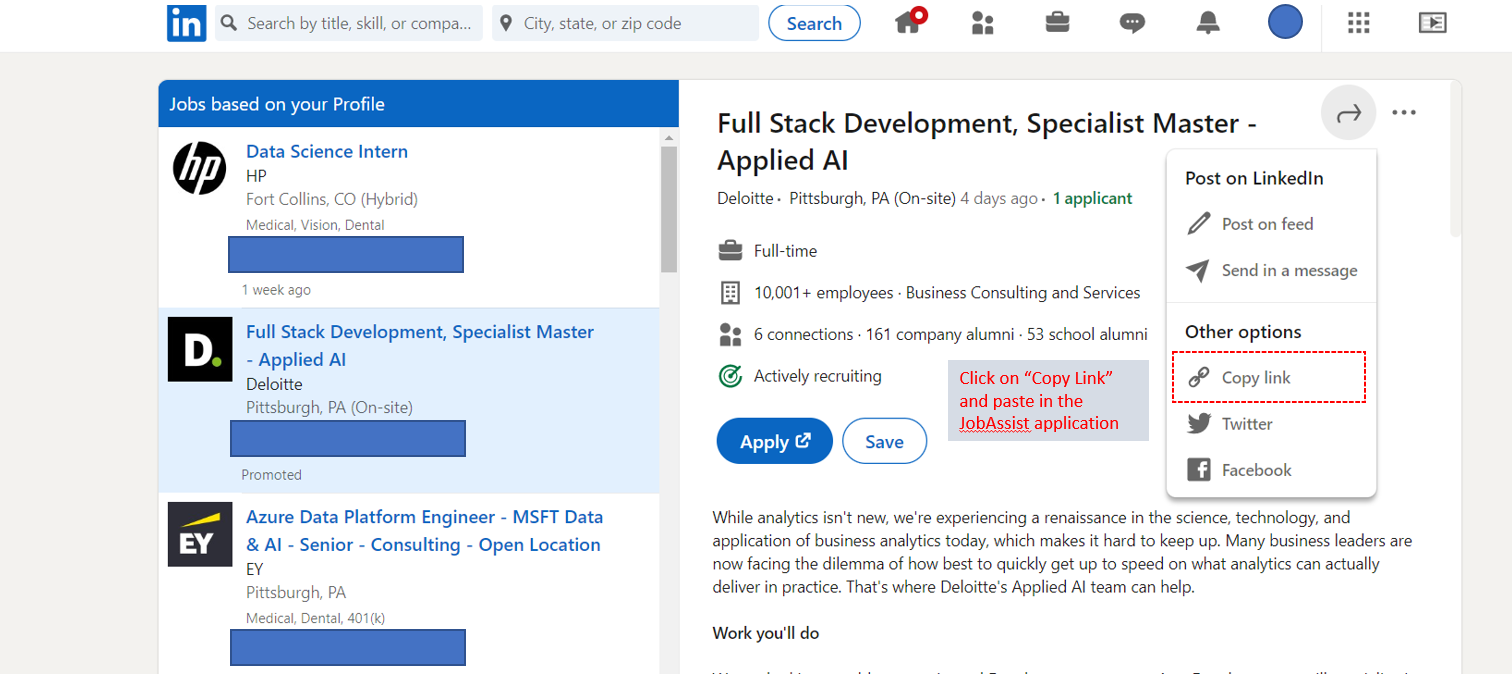

In [14]:
widgets.VBox([widgets.HBox([text, button]), int_progress])

LinkedIn...Executed
Indeed...Executed
Glassdoor..

In [15]:
li_output

Output()

In [16]:
ind_output

Output()

In [17]:
gl_output

Output()

In [18]:
books_output

Output()